# Funnel Analysis of E-Commerce Website

## 1.Dataset background

This is data from an e-commerce website. The site is very simple and has just 4 pages:

1. The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

2. From the home page, the user can perform a search and land on the search page.

3. From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

4. If she does decide to buy, she ends up on the confirmation page

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

## 2. Objective

Do funnel and some other analysis to find where & when & why customers drop in in funnel

## 3. Dataset overview

In [1]:
# import neccessary libray
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import plotly
#import plotly.plotly as py
import chart_studio.plotly as py
from plotly import graph_objs as go
from __future__ import division
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
# import 1 file of customer informationn & 3 files of landing page
dfHome = pd.read_csv('D:\WORK\Data Analysis\Raw data\EC Data\home_page_table.csv')
dfSearch = pd.read_csv('D:\WORK\Data Analysis\Raw data\EC Data\search_page_table.csv')
dfPaymentC1 = pd.read_csv('D:\WORK\Data Analysis\Raw data\EC Data\payment_confirmation_table.csv')
dfPaymentP2 = pd.read_csv('D:\WORK\Data Analysis\Raw data\EC Data\payment_page_table.csv')
UserTable = pd.read_csv(r'D:\WORK\Data Analysis\Raw data\EC Data\user_table.csv')

In [3]:
# UserTable is base table of customers, other file describe user_id with their landing page, we will use user_id to map
UserTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   date     90400 non-null  object
 2   device   90400 non-null  object
 3   sex      90400 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [4]:
# merge all to 1 table
df = pd.merge(UserTable,dfHome, how='left',on = 'user_id')
#df = df.rename(columns={'page': 'Step_1'})
df = pd.merge(df,dfSearch, how='left',on = 'user_id',suffixes=('_HomePage', '_SearchPage'))
df = pd.merge(df,dfPaymentP2, how='left',on = 'user_id',suffixes=('_SearchPage', '_PaymentPage'))
df = pd.merge(df,dfPaymentC1, how='left',on = 'user_id',suffixes=('_PaymentPage', '_ConfirmationPage'))
df

,user_id,date,device,sex,page_HomePage,page_SearchPage,page_PaymentPage,page_ConfirmationPage
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


In [5]:
# Add column of each page with 0/1 value
df['HomePage'] = np.where(df['page_HomePage'].isnull(), 0, 1)
df['SearchPage'] = np.where(df['page_SearchPage'].isnull(), 0, 1)
df['PaymentPage'] = np.where(df['page_PaymentPage'].isnull(), 0, 1)
df['ConfirmationPage'] = np.where(df['page_ConfirmationPage'].isnull(), 0, 1)
df

,user_id,date,device,sex,page_HomePage,page_SearchPage,page_PaymentPage,page_ConfirmationPage,HomePage,SearchPage,PaymentPage,ConfirmationPage
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,1,0,0,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,1,0,0,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,1,1,0,0
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,1,1,0,0
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN,1,0,0,0
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN,1,1,0,0
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN,1,1,0,0
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN,1,0,0,0


In [6]:
# drop old columns
df.drop(['page_HomePage', 'page_SearchPage','page_PaymentPage','page_ConfirmationPage'], axis=1, inplace=True)
df

,user_id,date,device,sex,HomePage,SearchPage,PaymentPage,ConfirmationPage
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0,0,0
90396,642989,2015-02-08,Desktop,Female,1,1,0,0
90397,659645,2015-04-13,Desktop,Male,1,1,0,0
90398,359779,2015-03-23,Desktop,Male,1,0,0,0


Now we have 1 table with full information

## 4. Analysis

### Create Funnel chart

In [7]:
values = [df['HomePage'].sum(), df['SearchPage'].sum(), df['PaymentPage'].sum(), df['ConfirmationPage'].sum()]
phases = ['Home', 'Search', 'Payment', 'Confirm']

In [8]:
# Visulizing the funnel. 
# reference: https://plotly.com/python/funnel-charts/
from plotly import graph_objects as go
import matplotlib.pyplot as plt

fig = go.Figure(go.Funnel(
    #y = ["Homepage","Search","Payment", "Confirmation"],
    y = phases,
    #x = [90400,45200,6030,452],
    x = values,
    textposition = "outside",
    textinfo = "value+percent initial"))

plt.figure(figsize=(8,6))
fig.show()

<Figure size 800x600 with 0 Axes>

From the funnel chart, we can see that:
* 50% customers get to search page, 7% get the payment page, but only 1% confirm to buy
* We lost many customers from Search page to Payment and then Confirmation page
* The funnel does not look very healthy
We check the funnel for segmentation of sex and divice to deep understand

### Customer segmentation by Gender

In [9]:
df_gender = df.groupby(by='sex')['HomePage','SearchPage','PaymentPage','ConfirmationPage'].sum().reset_index()
df_gender

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17084\652840166.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sex,HomePage,SearchPage,PaymentPage,ConfirmationPage
0,Female,45075,22676,3100,241
1,Male,45325,22524,2930,211


In [10]:
#Using graph_objects to plot gender_drop.
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Female',
    y = phases,
    x = [45075, 22676, 3100, 241],
    textposition = 'inside',
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Male',
    orientation = "h",
    y = phases,
    x = [45325, 22524, 2930, 211],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

We can see that the segmented funnel chart is quite balanced, meaning that gender might not be a factor that drive the decrease of conversion rate

### Customer segmentation by Device

In [11]:
df_device = df.groupby(by=['device'])['HomePage','SearchPage','PaymentPage','ConfirmationPage'].sum().reset_index()
df_device

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17084\1162550525.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,device,HomePage,SearchPage,PaymentPage,ConfirmationPage
0,Desktop,60200,30100,3010,150
1,Mobile,30200,15100,3020,302


In [12]:
#Plot the graph to show the funnel
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Desktop',
    y = phases,
    x = [60200, 30100, 3010, 150],
    textposition = 'inside',
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Mobile',
    orientation = "h",
    y = phases,
    x = [30200, 15100, 3020, 302],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

This funnel segmented by Devices is very unbalanced. Few things can be observed:
* More users are using Desktop rather than mobile
* Desktop conversion rate changed more significant than mobile on payment page

### Change of customers overtime

In [13]:
# Convert data type by .apply(pd.to_datetime)
df['date'] = df['date'].apply(pd.to_datetime)
df['month'] = pd.DatetimeIndex(df['date']).month
df

,user_id,date,device,sex,HomePage,SearchPage,PaymentPage,ConfirmationPage,month
0,450007,2015-02-28,Desktop,Female,1,0,0,0,2
1,756838,2015-01-13,Desktop,Male,1,0,0,0,1
2,568983,2015-04-09,Desktop,Male,1,1,0,0,4
3,190794,2015-02-18,Desktop,Female,1,1,0,0,2
4,537909,2015-01-15,Desktop,Male,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0,0,0,3
90396,642989,2015-02-08,Desktop,Female,1,1,0,0,2
90397,659645,2015-04-13,Desktop,Male,1,1,0,0,4
90398,359779,2015-03-23,Desktop,Male,1,0,0,0,3


In [14]:
# Change month to month name by using calendar and lambda
import calendar
df['month'] = df['month'].apply(lambda x:calendar.month_abbr[x])
df

,user_id,date,device,sex,HomePage,SearchPage,PaymentPage,ConfirmationPage,month
0,450007,2015-02-28,Desktop,Female,1,0,0,0,Feb
1,756838,2015-01-13,Desktop,Male,1,0,0,0,Jan
2,568983,2015-04-09,Desktop,Male,1,1,0,0,Apr
3,190794,2015-02-18,Desktop,Female,1,1,0,0,Feb
4,537909,2015-01-15,Desktop,Male,1,0,0,0,Jan
...,...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,1,0,0,0,Mar
90396,642989,2015-02-08,Desktop,Female,1,1,0,0,Feb
90397,659645,2015-04-13,Desktop,Male,1,1,0,0,Apr
90398,359779,2015-03-23,Desktop,Male,1,0,0,0,Mar


In [15]:
df_time = df.groupby(by=['date'])['HomePage','SearchPage','PaymentPage','ConfirmationPage'].sum().reset_index()
df_time

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17084\1954837148.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,HomePage,SearchPage,PaymentPage,ConfirmationPage
0,2015-01-01,712,436,76,6
1,2015-01-02,721,447,84,5
2,2015-01-03,760,422,64,7
3,2015-01-04,713,447,76,7
4,2015-01-05,754,462,88,11
...,...,...,...,...,...
115,2015-04-26,792,307,25,1
116,2015-04-27,779,311,26,1
117,2015-04-28,736,304,25,1
118,2015-04-29,713,271,10,0


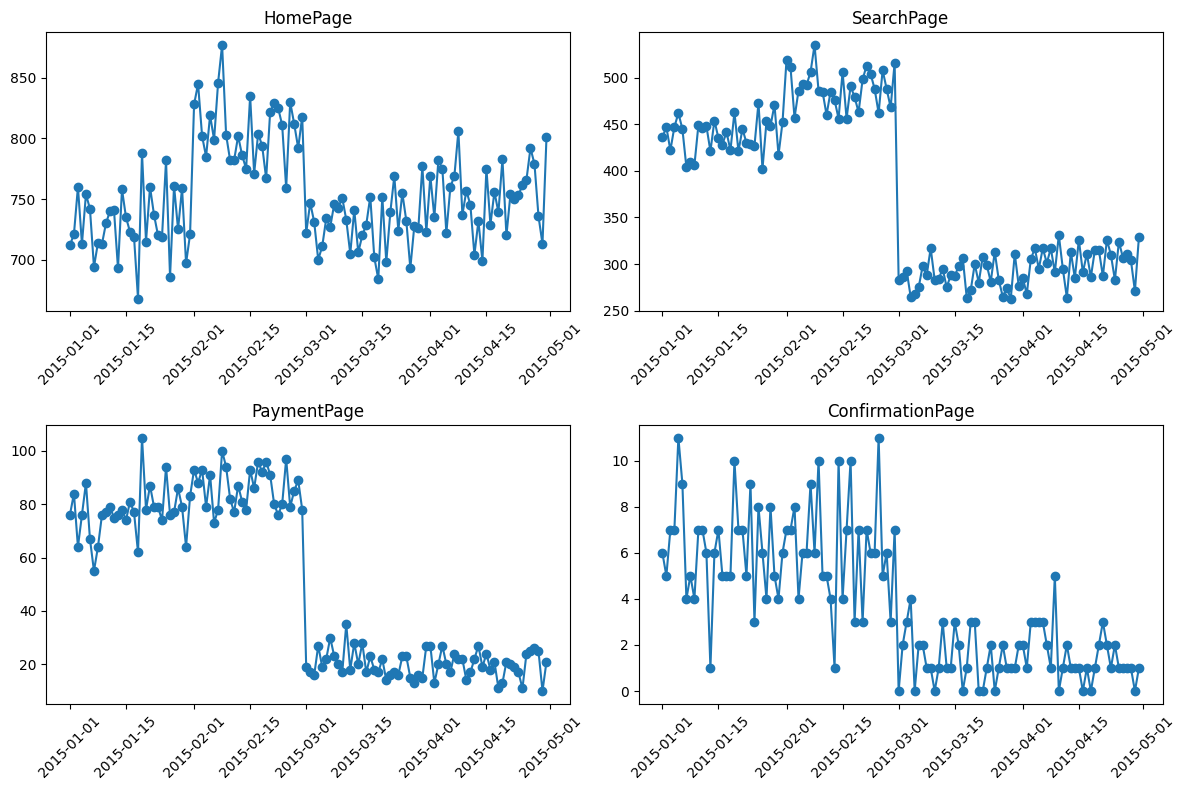

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each column
plt.subplot(2, 2, 1)
plt.plot(df_time['date'], df_time['HomePage'], marker='o')
plt.title('HomePage')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(df_time['date'], df_time['SearchPage'], marker='o')
plt.title('SearchPage')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.plot(df_time['date'], df_time['PaymentPage'], marker='o')
plt.title('PaymentPage')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.plot(df_time['date'], df_time['ConfirmationPage'], marker='o')
plt.title('ConfirmationPage')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the chart, we can see that:
* There is a rise of visitors from 1st Feb, and an obvious drop from 1st Mar
* It has very huge drop in Search page and Payment page from 1st Mar
* Customers in Confirmation page is quite low and drop more from 1st Mar 

## Conclusion & Recommendation

Through the analysis, we can focus on these things:
#### Find root cause
* Check with business team there are any special things (promotion or sepcial day...) that attract more users
* Check reason why from 1st Mar, the dropping rate is so high (stop promotion, new competitors in market or any fluctuation...)
* Check with product team to know more insight from this team, see how the flow of customer journey, UI/UX which affect to customer experience (slow loading, difficult to see and choose product)
#### Action
* Acquire new customers as the Homepage visitors are volatile
* Base on insight & co-operation with product and MKT teeam, we can do A/B testing on promotion campaign, the modification on UI, new product to get more insight & find out how to imporove product/UI/UI/MKT campaign